# Non-linear Least Squares

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline
#plt.rcParams['font.size'] = '10'

## Signal model
Consider the non-linear model $s[n] = \mathbf{H}(\theta)$ <br>
Find $\theta$ that minimizes
$$J(\theta) = (\mathbf{x}-\mathbf{H}(\theta))^T (\mathbf{x}-\mathbf{H}(\theta)).$$

In [68]:
# Sinusoidal signal
N = 10
fo = 0.2
theta = [2,1]
n = np.arange(N)

# Signal + noise
sigma = 1
xn = theta[0]*np.cos(2*np.pi*fo*n+theta[1]) + sigma*np.random.randn(N)

N0 = 100
n0 = np.reshape(np.arange(N0)*N/N0,(N0,1))
sn0 = theta[0]*np.cos(2*np.pi*fo*n0+theta[1]) 

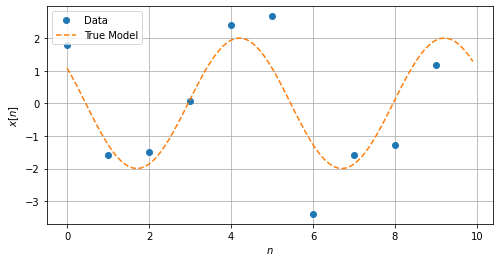

In [69]:
# Plotting data
plt.figure(figsize=[8,4])
plt.plot(n,xn,'o')
plt.plot(n0,sn0,'--')
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.legend(['Data','True Model']);

In [70]:
# Linearizing
cosn = np.reshape(np.cos(2*np.pi*fo*n),(N,1))
sinn = np.reshape(np.sin(2*np.pi*fo*n),(N,1))
H = np.hstack((cosn,sinn))

# Calculating the estimator
alpha_LS = np.linalg.inv(H.T@H)@H.T@xn
alpha_LS = np.ravel(alpha_LS)

theta_LS = [np.sqrt(np.sum(alpha_LS**2)),np.arctan2(-alpha_LS[1],alpha_LS[0])]
J_min = np.sum((xn-H@alpha_LS)**2)

H0 = np.hstack((np.cos(2*np.pi*fo*n0),np.sin(2*np.pi*fo*n0)))
sn_LS = H0@alpha_LS

print('Estimated Parameters alpha:',alpha_LS)
print('Estimated Parameters theta:',theta_LS)
print('Min squared error:',J_min)


Estimated Parameters alpha: [ 1.50068272 -1.84562139]
Estimated Parameters theta: [2.3787322113871854, 0.8881158680315714]
Min squared error: 9.587554237242474


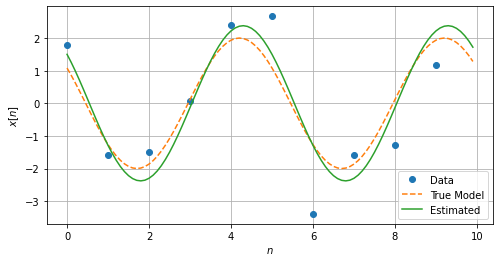

In [71]:
# Plotting the estimator
plt.figure(figsize=[8,4])
plt.plot(n,xn,'o')
plt.plot(n0,sn0,'--')
plt.plot(n0,sn_LS)
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.legend(['Data','True Model','Estimated'])

In [72]:
def func(theta):
    sn = theta[0]*np.cos(2*np.pi*fo*n+theta[1])
    return xn - sn
sol = leastsq(func,[0,0])
theta_LM = sol[0]
print('Estimated Parameters theta LS:',theta_LS)
print('Estimated Parameters theta LM:',theta_LM)


Estimated Parameters theta LS: [2.3787322113871854, 0.8881158680315714]
Estimated Parameters theta LM: [2.37873222 0.88811587]
